In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
#import statsmodels.formula.api as sm

from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
%matplotlib inline




df = pd.read_csv("Telco-Customer-Churn.csv")
#df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


df.head()

/Users/mingmei/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
col_names = df.columns.tolist()
print('The table has %r rows and %r columns'%df.shape)
print("Column names:", col_names)


The table has 7043 rows and 21 columns
Column names: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [3]:
np.sum(df.isnull())

# checks if there are any null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
print('First, we will take a look at each individual factor.')

First, we will take a look at each individual factor.


In [5]:
Gender_Churn = df[df.Churn == 'Yes'].groupby('gender').count()['customerID']
Gender_NC = df.groupby('gender').count()['customerID']

print(Gender_Churn/Gender_NC)
print('It does not appear that gender plays a huge role.')

gender
Female    0.269209
Male      0.261603
Name: customerID, dtype: float64
It does not appear that gender plays a huge role.


In [6]:
Seniors_Churn = df[df.Churn == 'Yes'].groupby('SeniorCitizen').count()['customerID']
Seniors_NC = df.groupby('SeniorCitizen').count()['customerID']

Senior_Ratio = Seniors_Churn/Seniors_NC
print(Senior_Ratio)
print('Seniors are', round(0.4168/0.2360,2),'times likely to churn.')

SeniorCitizen
0    0.236062
1    0.416813
Name: customerID, dtype: float64
Seniors are 1.77 times likely to churn.


In [7]:
Partner_Churn = df[df.Churn == 'Yes'].groupby('Partner').count()['customerID']
Partner_NC = df.groupby('Partner').count()['customerID']

print(Partner_Churn/Partner_NC)
print('Singles are', round(0.329580/0.196649,2),'times likely to churn.')

Partner
No     0.329580
Yes    0.196649
Name: customerID, dtype: float64
Singles are 1.68 times likely to churn.


In [8]:
Depend_Churn = df[df.Churn == 'Yes'].groupby('Dependents').count()['customerID']
Depend_NC = df.groupby('Dependents').count()['customerID']

print(Depend_Churn/Depend_NC)
print('Those without dependents are', round(0.312791/0.154502,2),'times likely to churn.')

Dependents
No     0.312791
Yes    0.154502
Name: customerID, dtype: float64
Those without dependents are 2.02 times likely to churn.


In [9]:
Phone_Churn = df[df.Churn == 'Yes'].groupby('PhoneService').count()['customerID']
Phone_NC = df.groupby('PhoneService').count()['customerID']

print(Phone_Churn/Phone_NC)
print('Phone Service does not seem to affect churn rates.')

PhoneService
No     0.249267
Yes    0.267096
Name: customerID, dtype: float64
Phone Service does not seem to affect churn rates.


In [10]:
MultipleLines_Churn = df[df.Churn == 'Yes'].groupby('MultipleLines').count()['customerID']
MultipleLines_NC = df.groupby('MultipleLines').count()['customerID']

print(MultipleLines_Churn/MultipleLines_NC)
print('Having multiple lines does not seem to affect churn rates.')

MultipleLines
No                  0.250442
No phone service    0.249267
Yes                 0.286099
Name: customerID, dtype: float64
Having multiple lines does not seem to affect churn rates.


In [11]:
Internet_Churn = df[df.Churn == 'Yes'].groupby('InternetService').count()['customerID']
Internet_NC = df.groupby('InternetService').count()['customerID']
print(Internet_Churn/Internet_NC)

print('Those with Fiber Optic Internet Service are', round(0.418928/0.189591,2),
      'times likely to churn as DSL and', round(0.418928/0.074050,2), 'times likely to churn as those without any internet service.')

InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: customerID, dtype: float64
Those with Fiber Optic Internet Service are 2.21 times likely to churn as DSL and 5.66 times likely to churn as those without any internet service.


In [12]:
Online_Secure_Churn = df[df.Churn == 'Yes'].groupby('OnlineSecurity').count()['customerID']
Online_Secure_NC = df.groupby('OnlineSecurity').count()['customerID']
print(Online_Secure_Churn/Online_Secure_NC)

print('Those with no Online Security are', round(0.417667/0.146112,2),
      'times likely to churn as those with it and', round(0.417667/0.074050,2), 
      'times likely to churn as those without either internet service or online security.')

OnlineSecurity
No                     0.417667
No internet service    0.074050
Yes                    0.146112
Name: customerID, dtype: float64
Those with no Online Security are 2.86 times likely to churn as those with it and 5.64 times likely to churn as those without either internet service or online security.


In [13]:
Online_Backup_Churn = df[df.Churn == 'Yes'].groupby('OnlineBackup').count()['customerID']
Online_Backup_NC = df.groupby('OnlineSecurity').count()['customerID']
print(Online_Backup_Churn/Online_Secure_NC)

print('Those with no Online Backup are', round(0.352487/0.259039,2),
      'times likely to churn as those with it and', round(0.352487/0.074050,2), 
      'times likely to churn as those without either internet service or online backup.')

OnlineBackup
No                     0.352487
No internet service    0.074050
Yes                    0.259039
Name: customerID, dtype: float64
Those with no Online Backup are 1.36 times likely to churn as those with it and 4.76 times likely to churn as those without either internet service or online backup.


In [14]:
Device_Protect_Churn = df[df.Churn == 'Yes'].groupby('DeviceProtection').count()['customerID']
Device_Protect_NC = df.groupby('DeviceProtection').count()['customerID']
print(Device_Protect_Churn/Device_Protect_NC)


print('Those with no Device Protection are', round(0.391276/0.225021,2),
      'times likely to churn as those with it and', round(0.391276/0.074050,2), 
      'times likely to churn as those without either Internet Service or Device Protection.')

DeviceProtection
No                     0.391276
No internet service    0.074050
Yes                    0.225021
Name: customerID, dtype: float64
Those with no Device Protection are 1.74 times likely to churn as those with it and 5.28 times likely to churn as those without either Internet Service or Device Protection.


In [15]:
TechSupport_Churn = df[df.Churn == 'Yes'].groupby('TechSupport').count()['customerID']
TechSupport_NC = df.groupby('TechSupport').count()['customerID']
print(TechSupport_Churn/TechSupport_NC)


print('Those with no Tech Support are', round(0.416355/0.151663,2),
      'times likely to churn as those with it and', round(0.416355/0.074050,2), 
      'times likely to churn as those without either Internet Service or Tech Support.')

TechSupport
No                     0.416355
No internet service    0.074050
Yes                    0.151663
Name: customerID, dtype: float64
Those with no Tech Support are 2.75 times likely to churn as those with it and 5.62 times likely to churn as those without either Internet Service or Tech Support.


In [16]:
StreamingTV_Churn = df[df.Churn == 'Yes'].groupby('StreamingTV').count()['customerID']
StreamingTV_NC = df.groupby('StreamingTV').count()['customerID']
print(StreamingTV_Churn/StreamingTV_NC)

print('Those who do not Stream TV are', round(0.335231/0.300702,2),
      'times likely to churn as those who do and', round(0.335231/0.074050,2), 
      'times likely to churn as those without either Internet Service or Stream TV.')

StreamingTV
No                     0.335231
No internet service    0.074050
Yes                    0.300702
Name: customerID, dtype: float64
Those who do not Stream TV are 1.11 times likely to churn as those who do and 4.53 times likely to churn as those without either Internet Service or Stream TV.


In [17]:
StreamingMovies_Churn = df[df.Churn == 'Yes'].groupby('StreamingMovies').count()['customerID']
StreamingMovies_NC = df.groupby('StreamingMovies').count()['customerID']
print(StreamingMovies_Churn/StreamingMovies_NC)

print('Those who do not Stream Movies are', round(0.336804/0.299414,2),
      'times likely to churn as those who do and', round(0.336804/0.074050,2), 
      'times likely to churn as those without either Internet Service or Stream Movies.')

StreamingMovies
No                     0.336804
No internet service    0.074050
Yes                    0.299414
Name: customerID, dtype: float64
Those who do not Stream Movies are 1.12 times likely to churn as those who do and 4.55 times likely to churn as those without either Internet Service or Stream Movies.


In [18]:
Contract_Churn = df[df.Churn == 'Yes'].groupby('Contract').count()['customerID']
Contract_NC = df.groupby('Contract').count()['customerID']
print(Contract_Churn/Contract_NC)

print('Those with Month-to-month Contracts are', round(0.427097/0.112695,2),
      'times likely to churn as those with 1-year Contracts and', round(0.427097/0.028319,2), 
      'times likely to churn as those with 1-year Contracts.')

Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: customerID, dtype: float64
Those with Month-to-month Contracts are 3.79 times likely to churn as those with 1-year Contracts and 15.08 times likely to churn as those with 1-year Contracts.


In [19]:
PaperlessBilling_Churn = df[df.Churn == 'Yes'].groupby('PaperlessBilling').count()['customerID']
PaperlessBilling_NC = df.groupby('PaperlessBilling').count()['customerID']
print(PaperlessBilling_Churn/PaperlessBilling_NC)


PaperlessBilling
No     0.163301
Yes    0.335651
Name: customerID, dtype: float64


In [20]:
PaymentMethod_Churn = df[df.Churn == 'Yes'].groupby('PaymentMethod').count()['customerID']
PaymentMethod_NC = df.groupby('PaymentMethod').count()['customerID']
print(PaymentMethod_Churn/PaymentMethod_NC)

PaymentMethod
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Electronic check             0.452854
Mailed check                 0.191067
Name: customerID, dtype: float64


In [21]:
print('Now onto the numerical variables')

Now onto the numerical variables


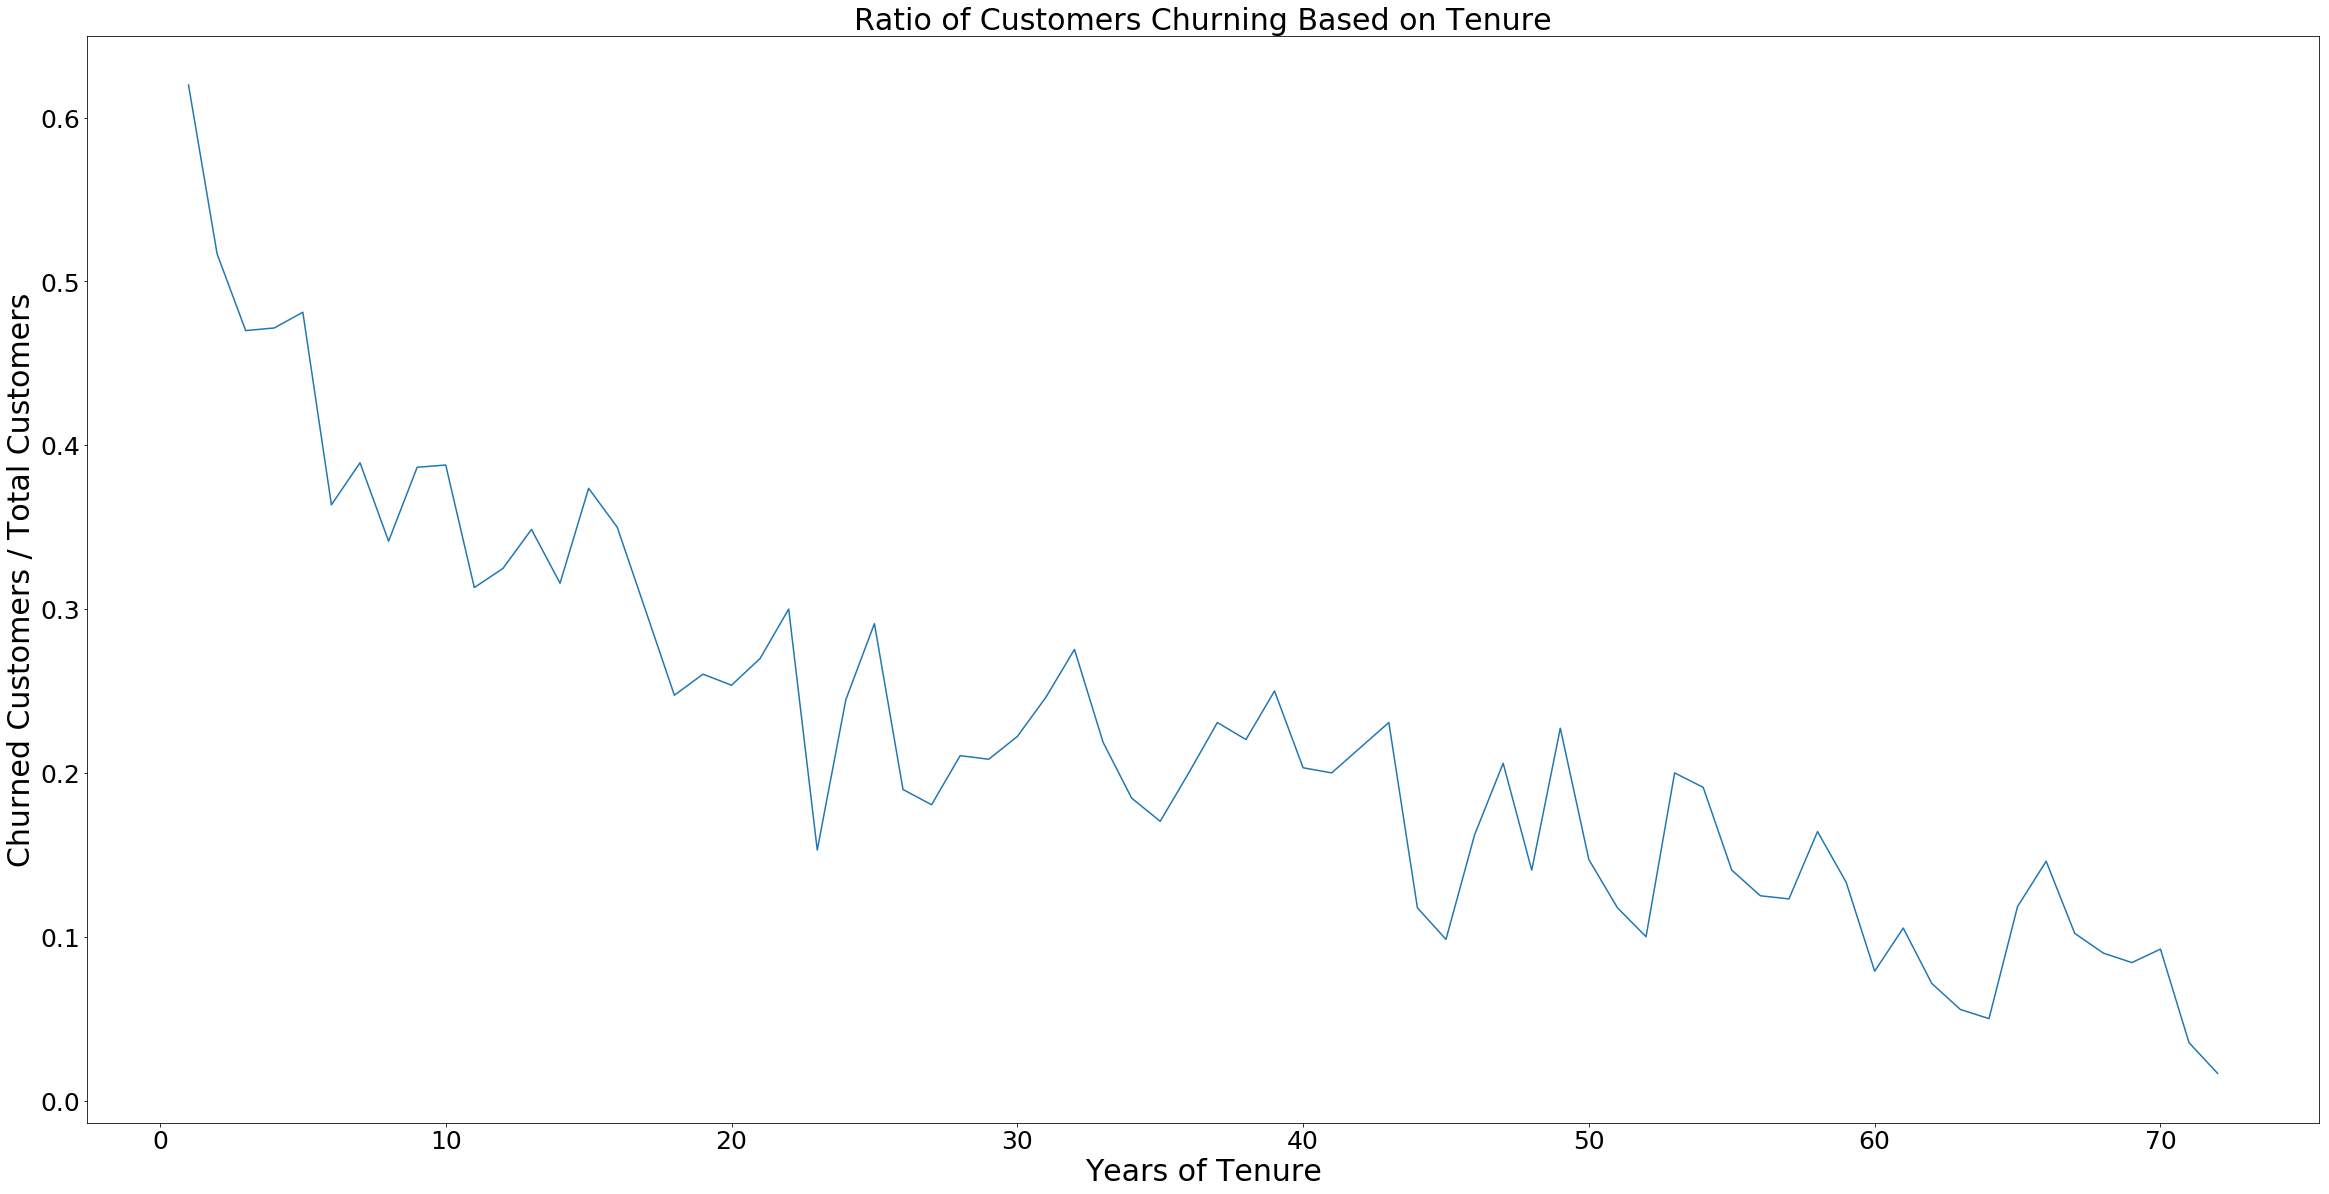

In [33]:
tenure_Churn = df[df.Churn == 'Yes'].groupby('tenure').count()['customerID']
tenure_NC = df.groupby('tenure').count()['customerID']
tenure_ratio = tenure_Churn/tenure_NC

tenure_ratio.plot()
plt.title('Ratio of Customers Churning Based on Tenure',size =30)
plt.xlabel('Years of Tenure', size = 30)
_ = plt.ylabel('Churned Customers / Total Customers', size = 30)
plt.tick_params(labelsize=25)
plt.rcParams['figure.figsize']=(40,40)




Monthly charges are rounded to the nearest dollar.
It seems that there is a bimodal distribution for churning based on monthly charges. 
The two modes are around $30-$40 and $70-$100.


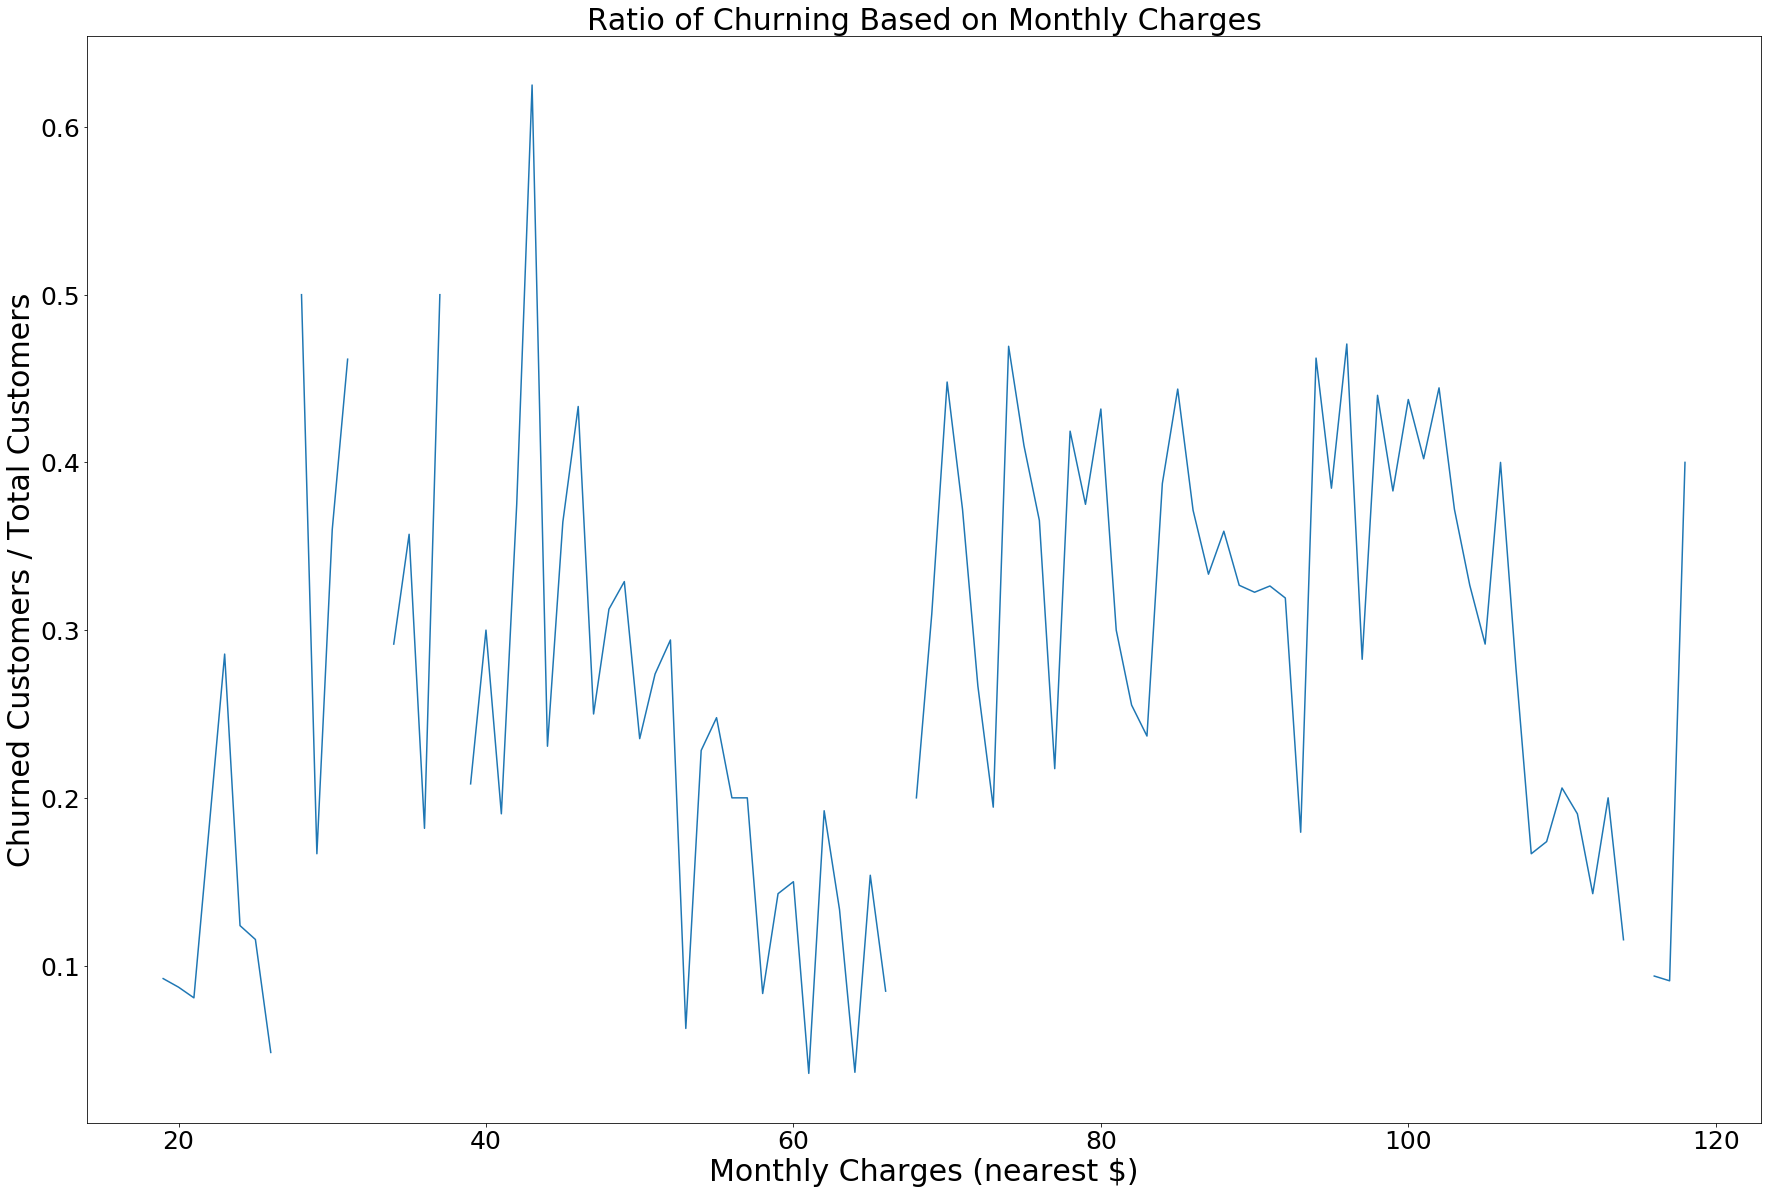

In [35]:
df.MonthlyCharges = df.MonthlyCharges.round()

MonthlyCharges_Churn = df[df.Churn == 'Yes'].groupby('MonthlyCharges').count()['customerID']
MonthlyCharges_NC = df.groupby('MonthlyCharges').count()['customerID']
MonthlyCharges_ratio = MonthlyCharges_Churn/MonthlyCharges_NC

MonthlyCharges_ratio.plot()
plt.title('Ratio of Churning Based on Monthly Charges',size =30)
plt.xlabel('Monthly Charges (nearest $)', size = 30)
_ = plt.ylabel('Churned Customers / Total Customers', size = 30)
plt.tick_params(labelsize=25)
plt.rcParams['figure.figsize']=(40,30)



print ('''
Monthly charges are rounded to the nearest dollar.
It seems that there is a bimodal distribution for churning based on monthly charges. 
The two modes are around $30-$40 and $70-$100.''')


Total charges are rounded to the nearest $100.
There seems to be a downward trend line. It is possible that the people paying more are more sold on the products
than their lower-paying counterparts.


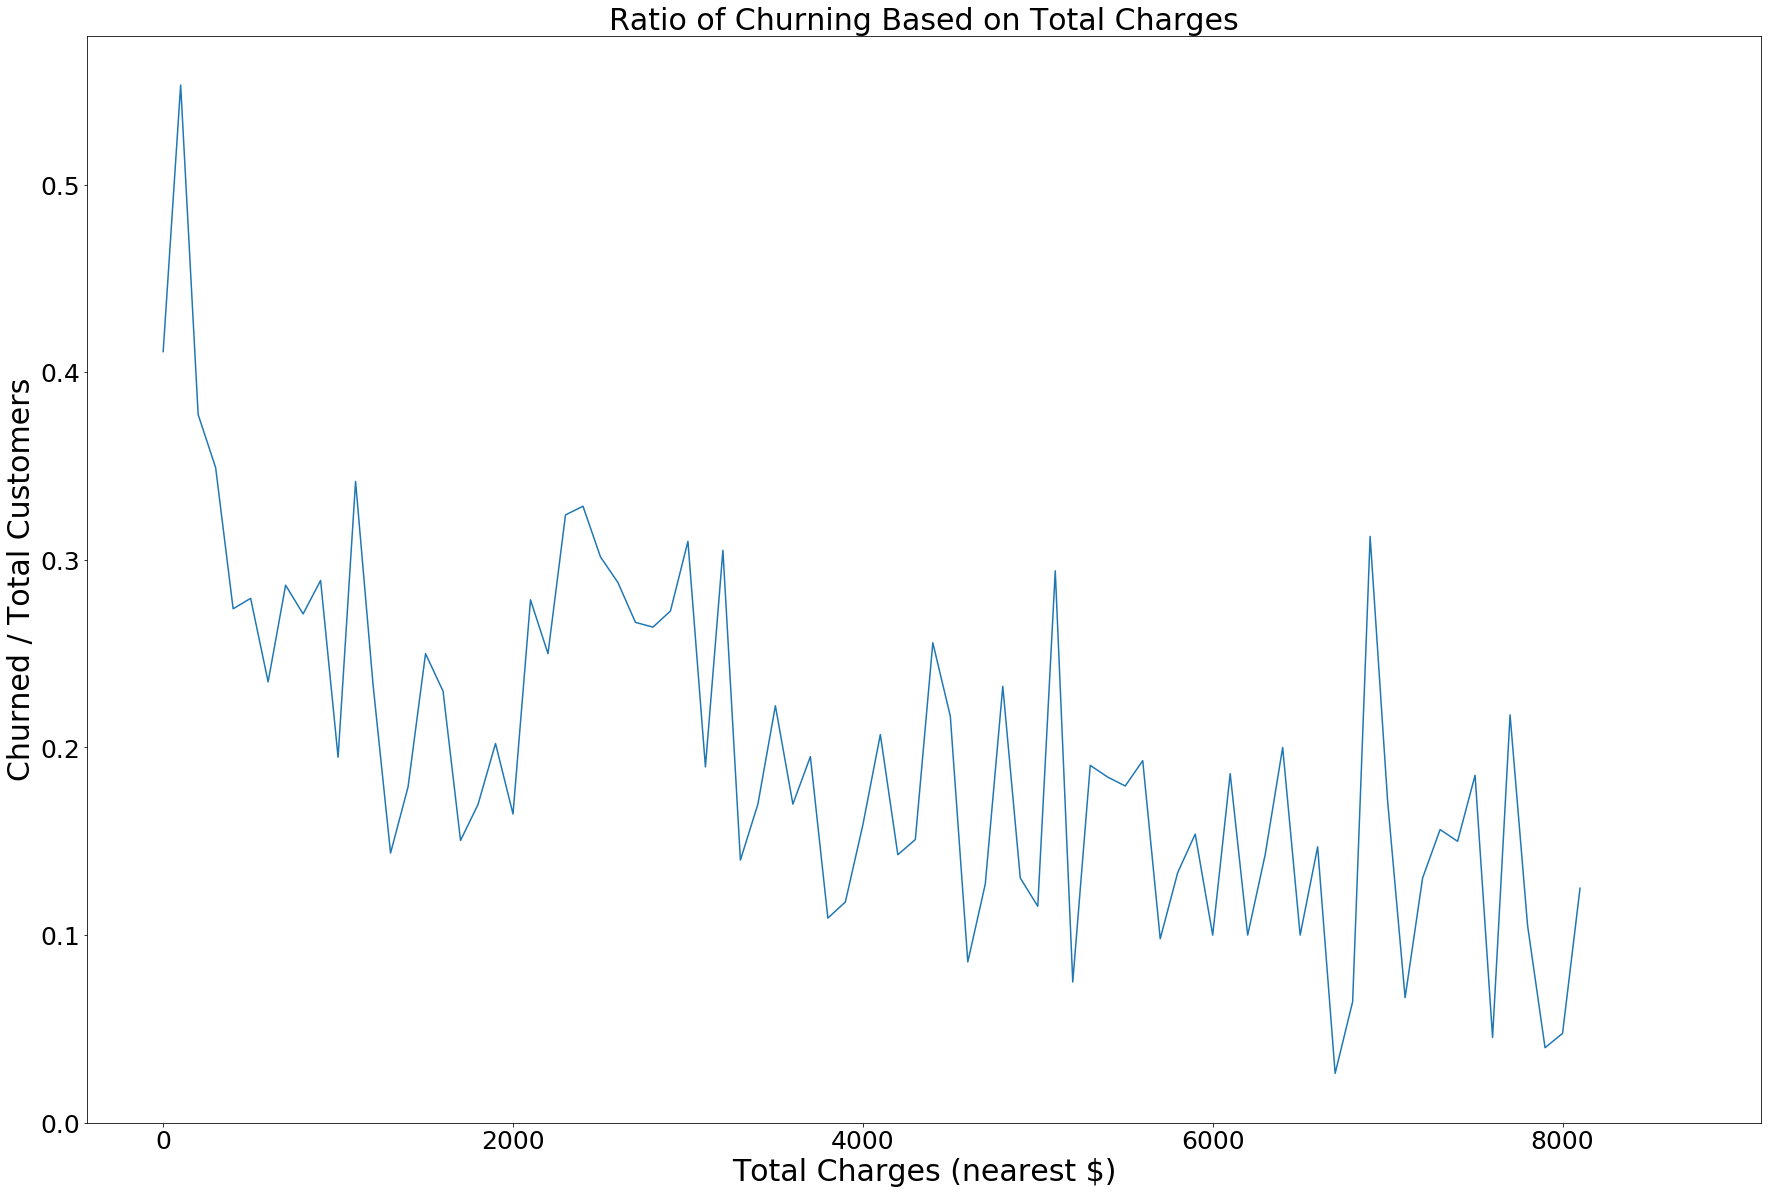

In [24]:
# print df.dtypes 
# to figureout what data types are for which column

df['TotalCharges'] = df['TotalCharges'].astype(str)
df.TotalCharges = (pd.to_numeric(df.TotalCharges, errors='coerce')).round(decimals=-2)

print('''
Total charges are rounded to the nearest $100.
There seems to be a downward trend line. It is possible that the people paying more are more sold on the products
than their lower-paying counterparts.''')

TotalCharges_Churn = df[df.Churn == 'Yes'].groupby('TotalCharges').count()['customerID']
TotalCharges_NC = df.groupby('TotalCharges').count()['customerID']
TotalCharges_ratio = TotalCharges_Churn/TotalCharges_NC

TotalCharges_ratio.plot()
plt.title('Ratio of Churning Based on Total Charges',size =30)
plt.xlabel('Total Charges (nearest $)', size = 30)
_ = plt.ylabel('Churned / Total Customers', size = 30)
plt.tick_params(labelsize=25)
plt.rcParams['figure.figsize']=(30,20)





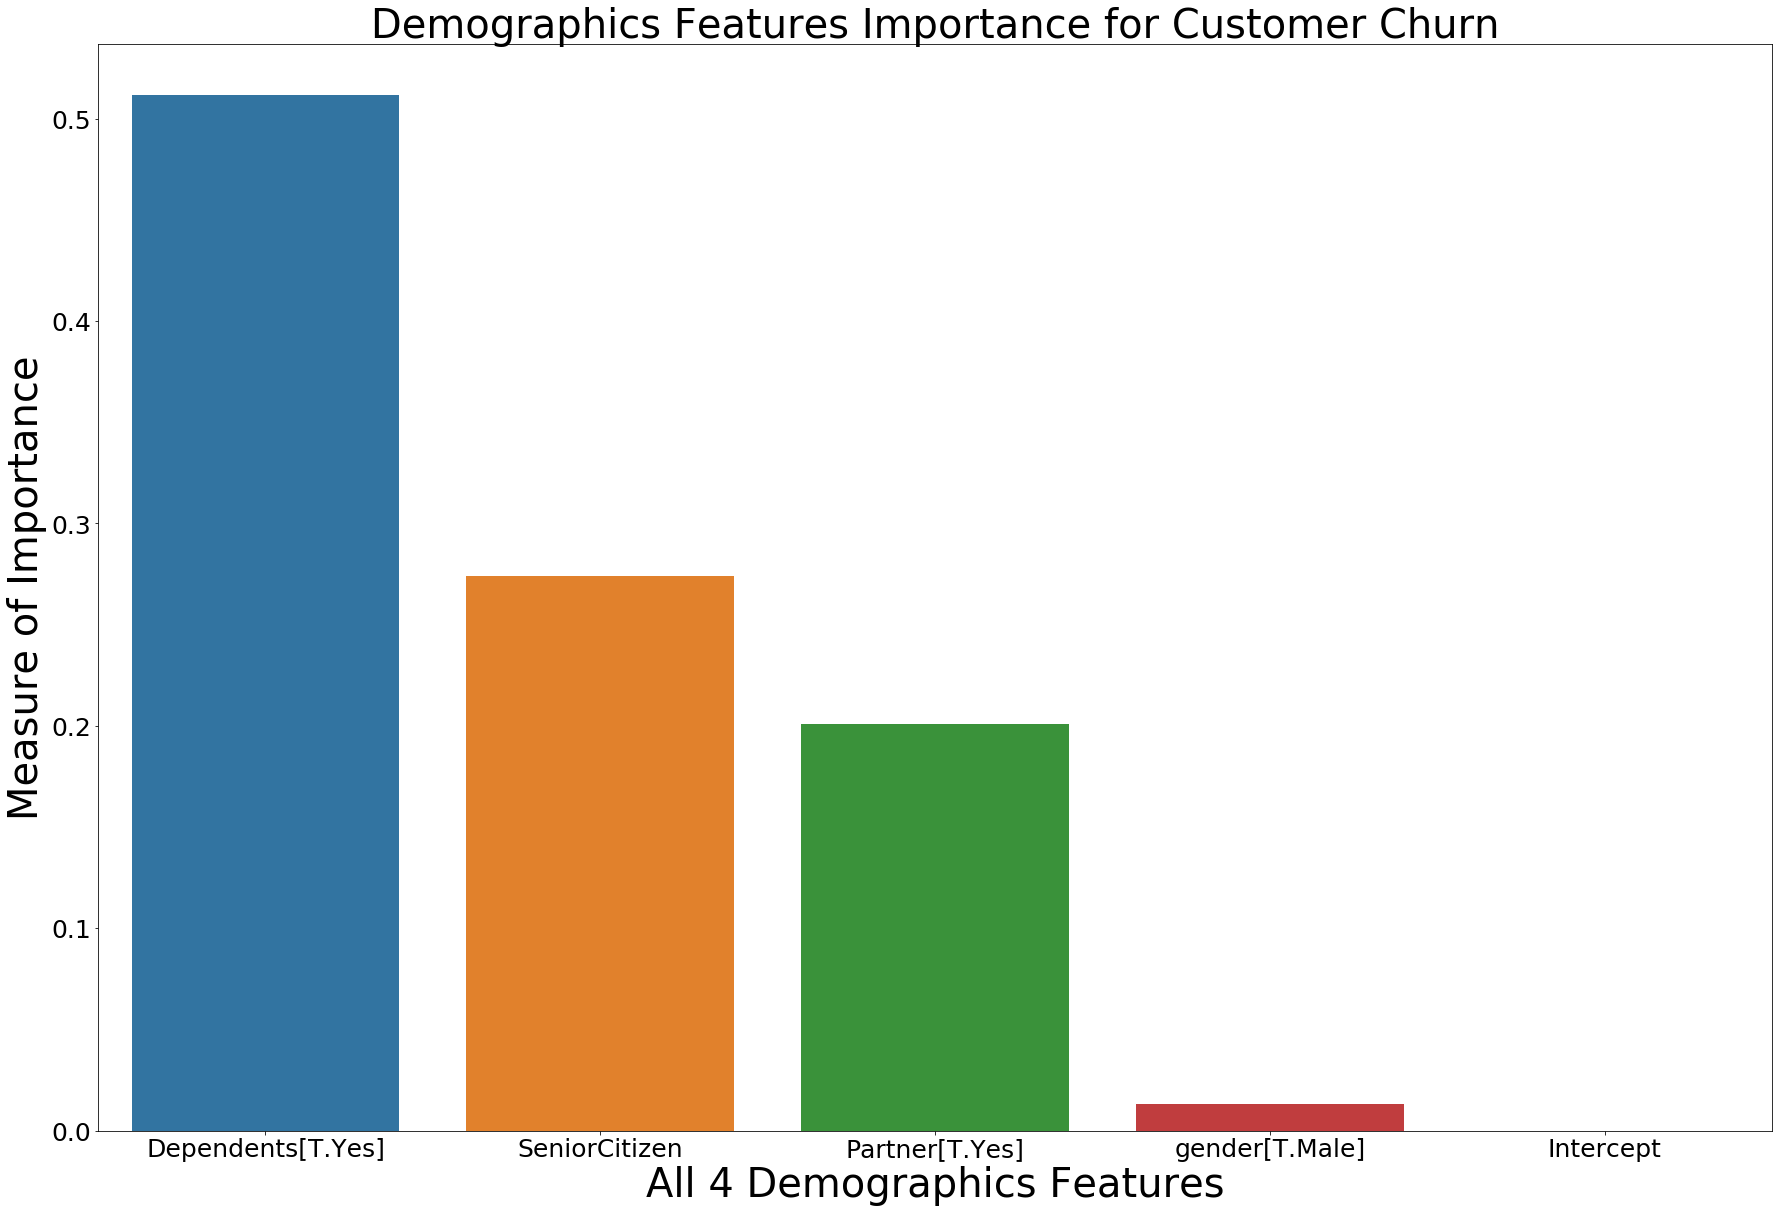

In [25]:
from patsy import dmatrices
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import seaborn as sns

formula = 'Churn ~ SeniorCitizen + Partner + Dependents + gender'

y, X = dmatrices(formula, df)

rf = DecisionTreeClassifier()
rf.fit(X,y)

temp = pd.DataFrame({'importance':rf.feature_importances_, 'feature': X.design_info.column_names})\
.sort_values('importance', ascending = False)
_ = sns.barplot(x = 'feature', y = 'importance', data = temp)
plt.rcParams['figure.figsize']=(30,40)
plt.tick_params(labelsize=25)

plt.title('Demographics Features Importance for Customer Churn',size =40)
plt.xlabel('All 4 Demographics Features', size = 40)
_ = plt.ylabel('Measure of Importance', size = 40)



In [26]:
print('''
Conclusions for Demographics:

Having dependents, being older and having partners seem to be the top three demographic factors affecting churn. 
Gender does not seem to be very important. Telco can advertise towards those who are married and/or have kids, 
since they become more long-term customers. Since seniors are 1.77 times likely to churn, Telco might think about 
advertising more heavily towards seniors and focus on senior customer retention.
''')


Conclusions for Demographics:

Having dependents, being older and having partners seem to be the top three demographic factors affecting churn. 
Gender does not seem to be very important. Telco can advertise towards those who are married and/or have kids, 
since they become more long-term customers. Since seniors are 1.77 times likely to churn, Telco might think about 
advertising more heavily towards seniors and focus on senior customer retention.



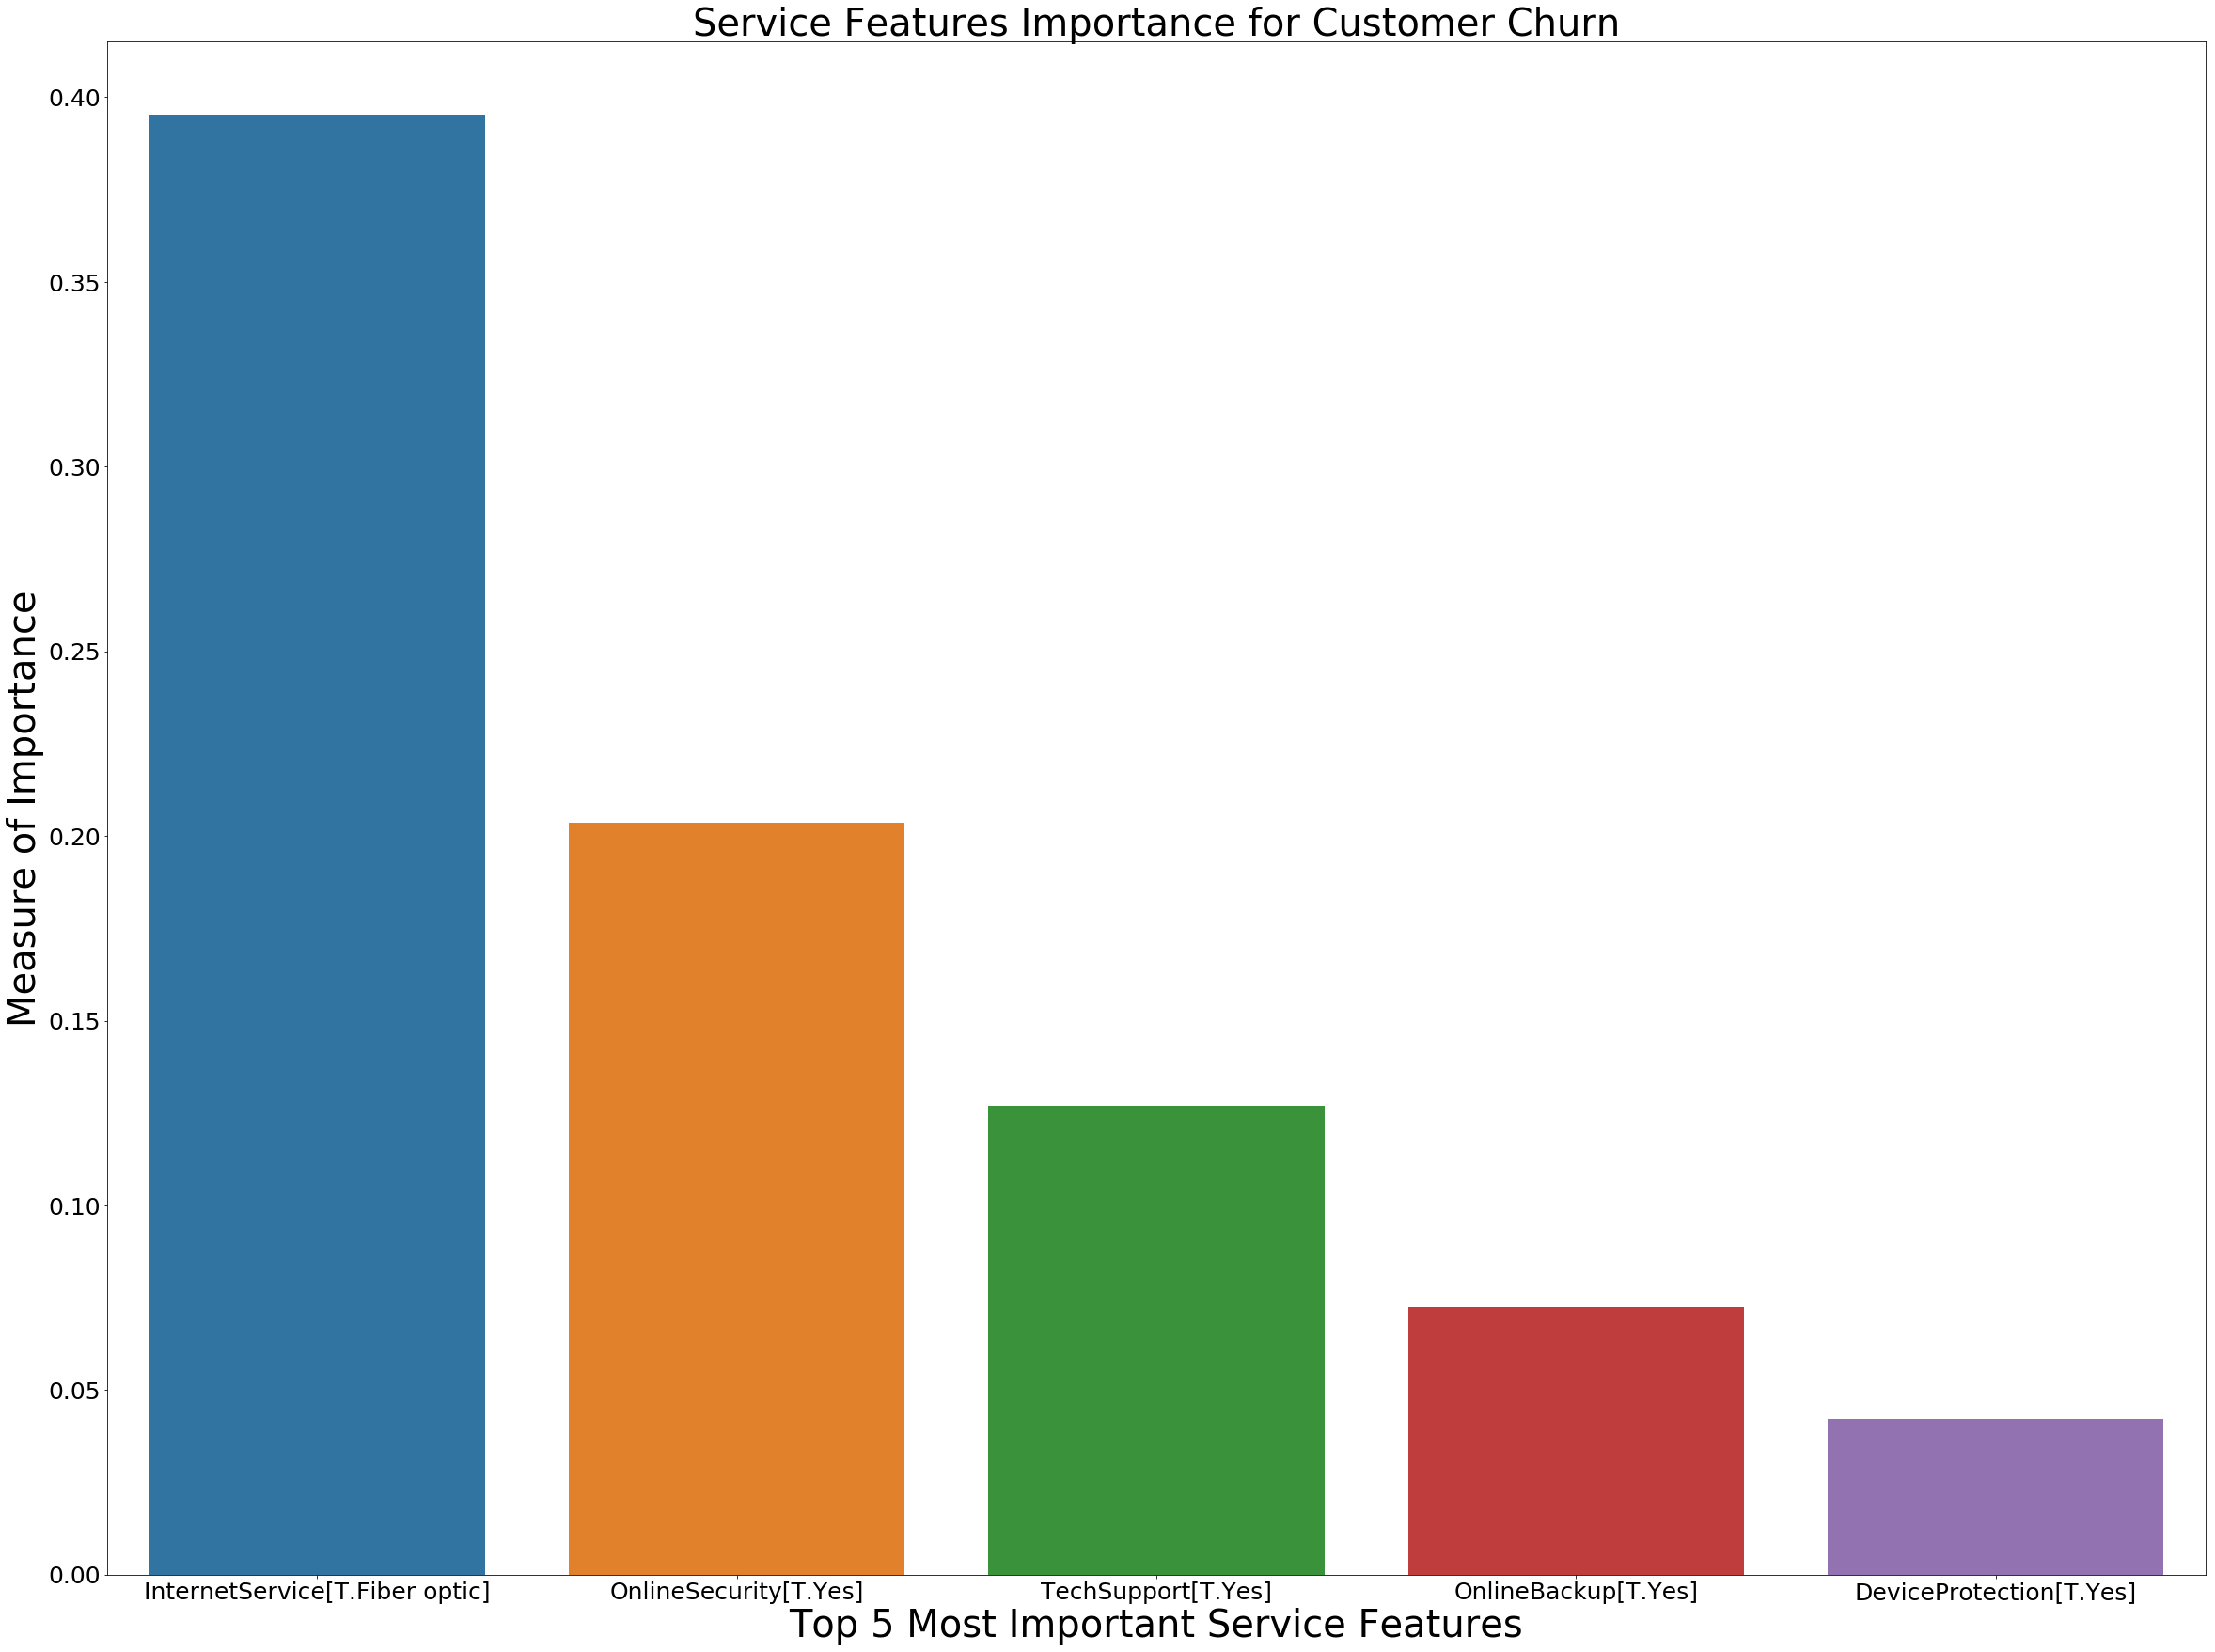

In [36]:

formula = 'Churn ~ PhoneService + MultipleLines + InternetService + OnlineBackup + OnlineSecurity + DeviceProtection + TechSupport + StreamingTV + StreamingMovies'

y, X = dmatrices(formula, df)

rf = DecisionTreeClassifier()
rf.fit(X,y)


temp = pd.DataFrame({'importance':rf.feature_importances_, 'feature': X.design_info.column_names})\
.sort_values('importance', ascending = False, na_position = 'first').head(5)
_ = sns.barplot(x = 'feature', y = 'importance', data = temp)
plt.rcParams['figure.figsize']=(40,30)
plt.tick_params(labelsize=25, rotation ='auto')

plt.title('Service Features Importance for Customer Churn',size =40)
plt.xlabel('Top 5 Most Important Service Features', size = 40)
_ = plt.ylabel('Measure of Importance', size = 40)


In [28]:
print('''
Conclusions for Service Features:

Whether customers have Internet Service seems to be a significant factor. Those with Fiber Optic service seems to
churn quite a bit more than DSL, so service may need improvements in that area. Additionally, Fiber Optic customers
should be made aware than they can transfer to DSL. Additionally, whether 
customers have Internet Service with Telco affects if they will subscribe to other internet-related services. 
In general, it seems that those with fewer services tend to churn more. Bundle discounts may be a good way to upsell
and to retain customers. 

''')


Conclusions for Service Features:

Whether customers have Internet Service seems to be a significant factor. Those with Fiber Optic service seems to
churn quite a bit more than DSL, so service may need improvements in that area. Additionally, Fiber Optic customers
should be made aware than they can transfer to DSL. Additionally, whether 
customers have Internet Service with Telco affects if they will subscribe to other internet-related services. 
In general, it seems that those with fewer services tend to churn more. Bundle discounts may be a good way to upsell
and to retain customers. 




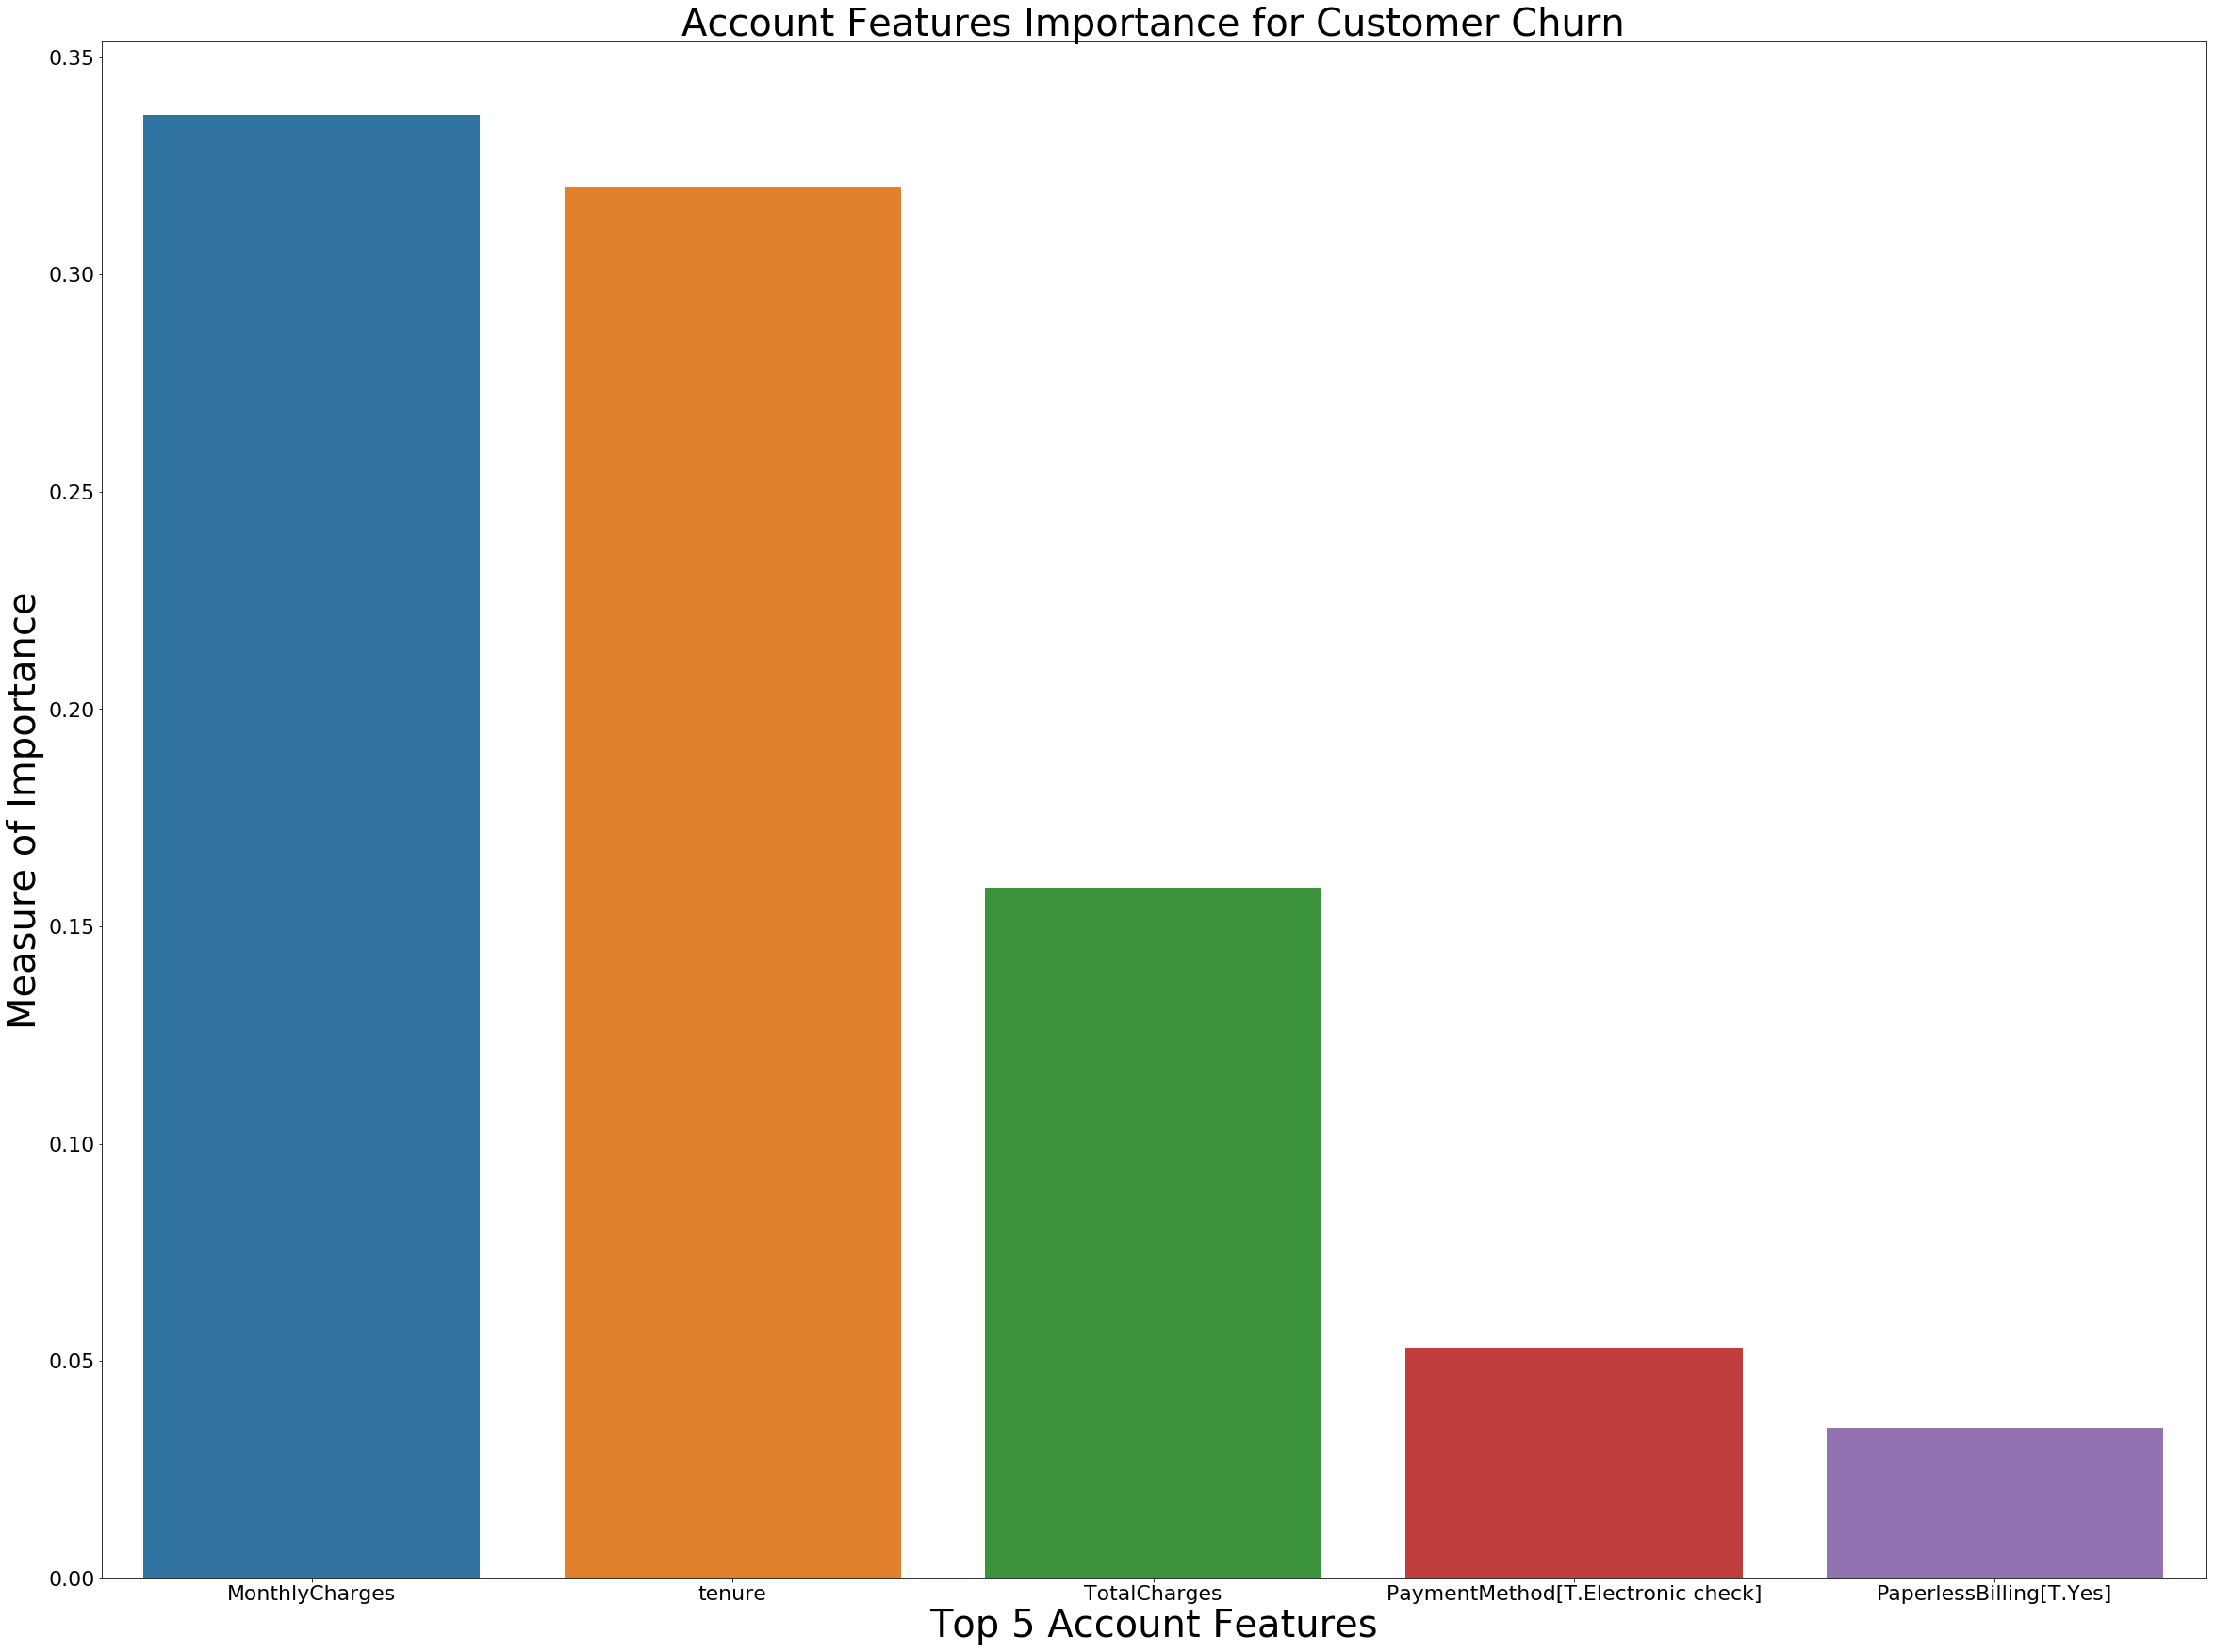

In [29]:
formula = 'Churn ~ tenure + MonthlyCharges + TotalCharges + Contract + PaperlessBilling + PaymentMethod'

y, X = dmatrices(formula, df)

rf = DecisionTreeClassifier()
rf.fit(X,y)

temp = pd.DataFrame({'importance':rf.feature_importances_, 'feature': X.design_info.column_names})\
.sort_values('importance', ascending = False, na_position = 'first').head(5)
_ = sns.barplot(x = 'feature', y = 'importance', data = temp)
plt.rcParams['figure.figsize']=(40,20)
plt.tick_params(labelsize=22, rotation ='auto')

plt.title('Account Features Importance for Customer Churn',size =40)
plt.xlabel('Top 5 Account Features', size = 40)
_ = plt.ylabel('Measure of Importance', size = 40)

In [30]:
print('''
Conclusions for Account Features:

Interestingly, there is a bimodal distribution for churning based on monthly charges. The two modes are around 
$30-$40 and $70-$100. This may reflect an income disparity between the customers. Retention methods should reflect
the income levels of the customers. For total charges and tenure, there is a downward trend for churn rates, meaning,
the higher the customers pay and the longer they've remained customers, the less likely they are to churn. This 
indicates that customers remain loyal and those who pay more are generally satisfied with the service they're receiving.

''')


Conclusions for Account Features:

Interestingly, there is a bimodal distribution for churning based on monthly charges. The two modes are around 
$30-$40 and $70-$100. This may reflect an income disparity between the customers. Retention methods should reflect
the income levels of the customers. For total charges and tenure, there is a downward trend for churn rates, meaning,
the higher the customers pay and the longer they've remained customers, the less likely they are to churn. This 
indicates that customers remain loyal and those who pay more are generally satisfied with the service they're receiving.




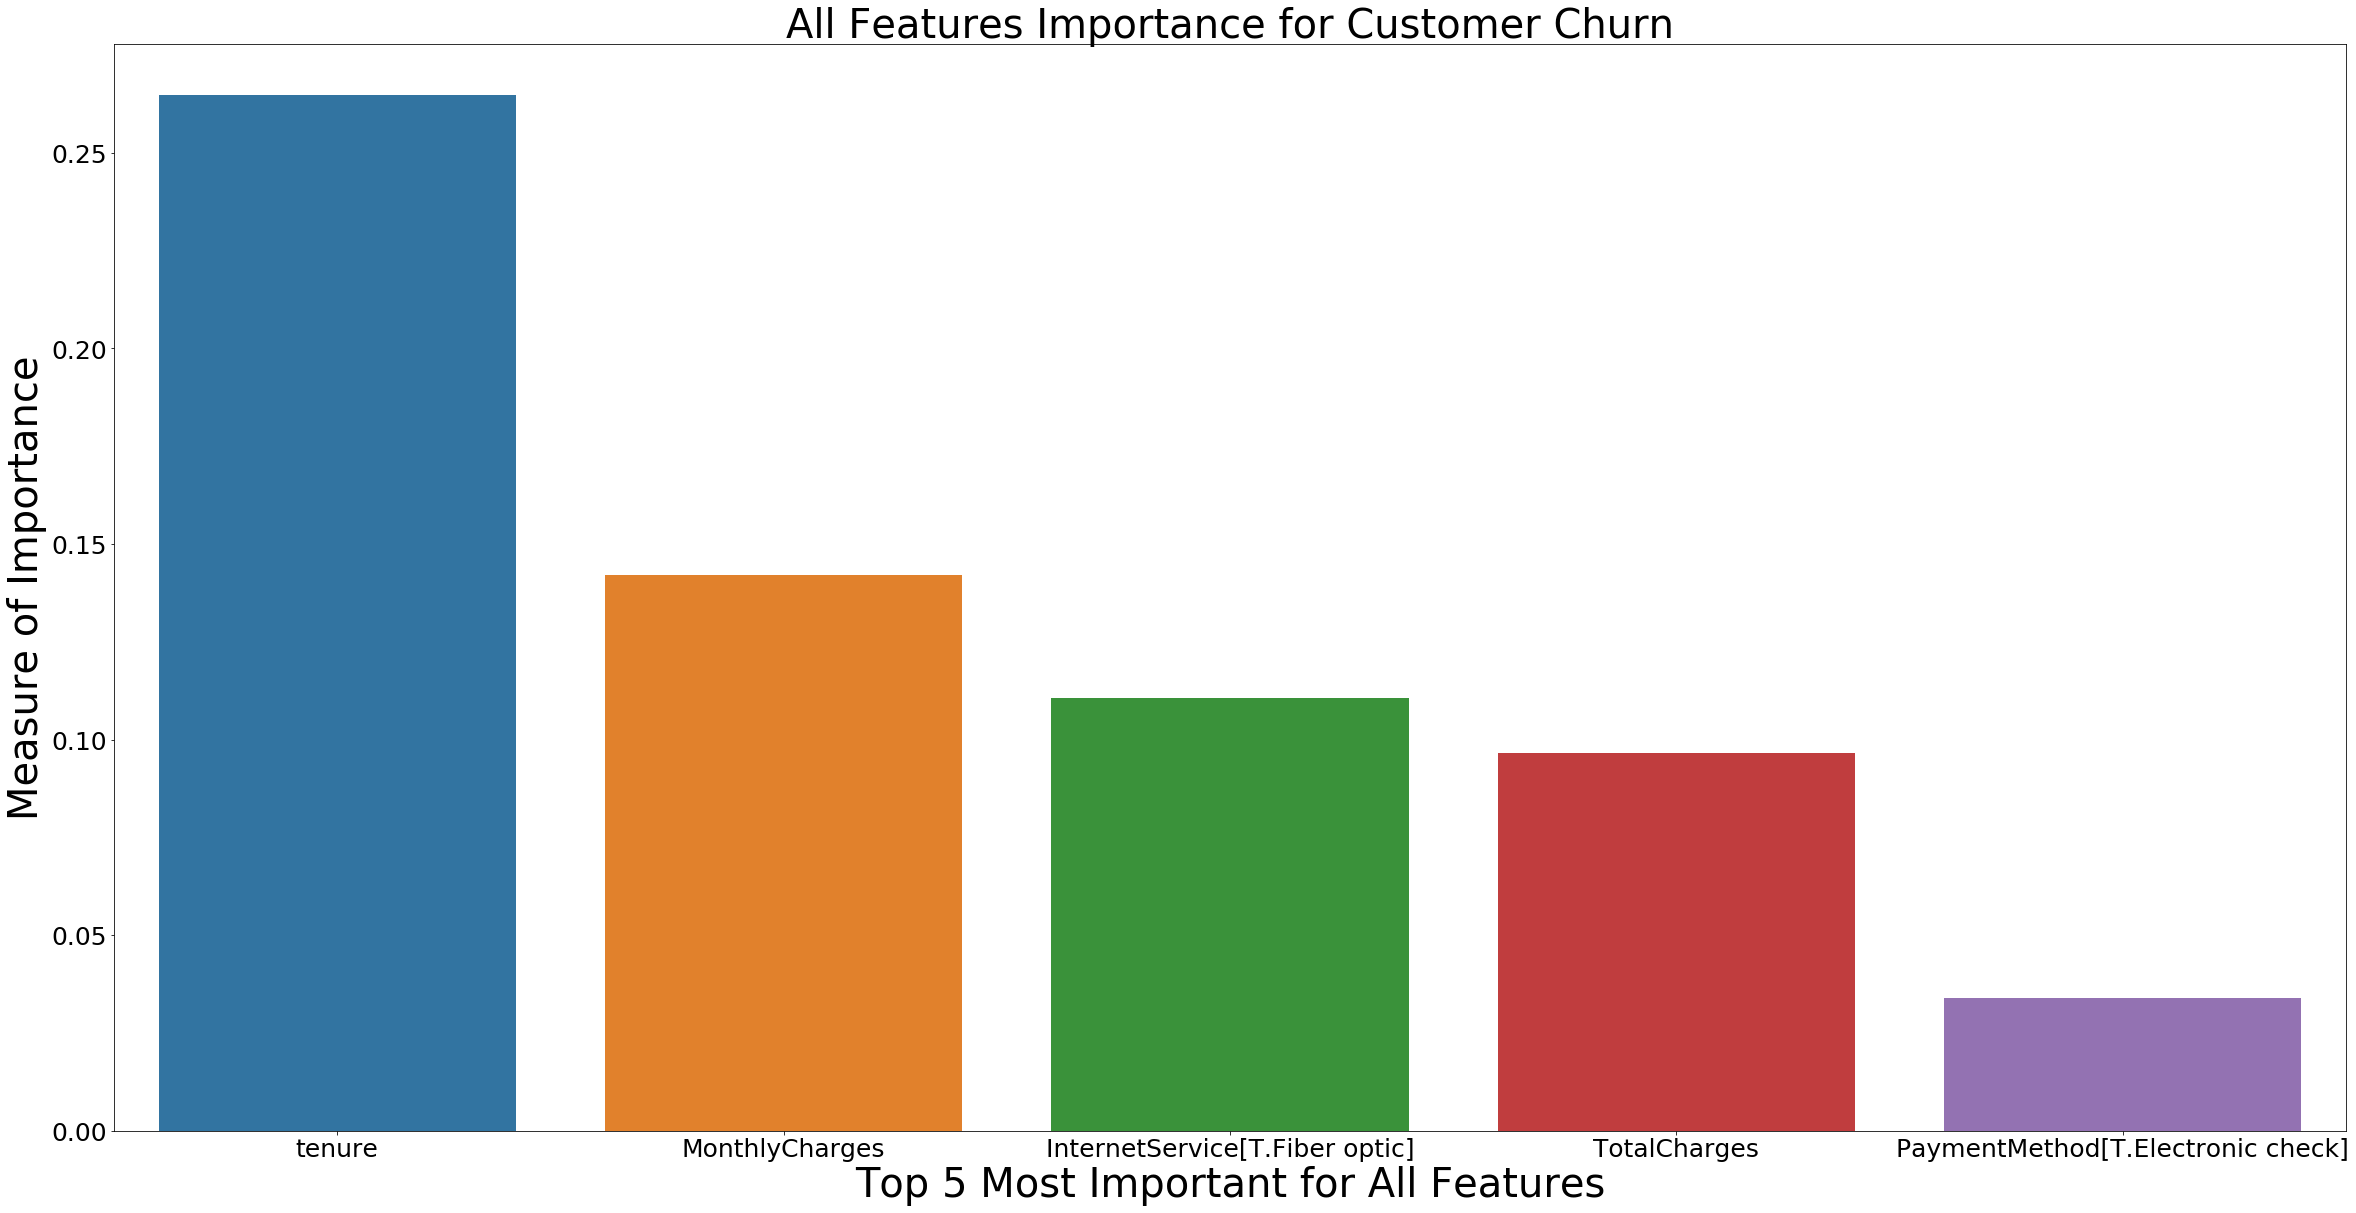

In [31]:
formula = 'Churn ~ tenure + MonthlyCharges + TotalCharges + Contract + PaperlessBilling + PaymentMethod + PhoneService + MultipleLines + InternetService + OnlineBackup + OnlineSecurity + DeviceProtection + TechSupport + StreamingTV + StreamingMovies + SeniorCitizen + Partner + Dependents + gender'

y, X = dmatrices(formula, df)

rf = DecisionTreeClassifier()
rf.fit(X,y)

temp = pd.DataFrame({'importance':rf.feature_importances_, 'feature': X.design_info.column_names})\
.sort_values('importance', ascending = False, na_position = 'first').head(5)
_ = sns.barplot(x = 'feature', y = 'importance', data = temp)
plt.rcParams['figure.figsize']=(40,20)
plt.tick_params(labelsize=25, rotation ='auto')

plt.title('All Features Importance for Customer Churn',size =40)
plt.xlabel('Top 5 Most Important for All Features', size = 40)
_ = plt.ylabel('Measure of Importance', size = 40)

In [32]:
print('''

Original Question:

Which customers are likely to leave and how can we proactively prevent that?


Summary: 
After putting it all together, it seems that tenure is the single most important factor determining churn rates.
It seems that customer loyalty is very important and should be nurtured. When customers are happy with the service,
they are likely to stay longer and be okay to pay more.


Future Reference:

For the future, it may be useful to gather more demographics data relating to income, lifestyle, and location. 
We can also measure the length of time customers remain with Telco as opposed churn rates in the past month.''')



Original Question:

Which customers are likely to leave and how can we proactively prevent that?


Summary: 
After putting it all together, it seems that tenure is the single most important factor determining churn rates.
It seems that customer loyalty is very important and should be nurtured. When customers are happy with the service,
they are likely to stay longer and be okay to pay more.


Future Reference:

For the future, it may be useful to gather more demographics data relating to income, lifestyle, and location. 
We can also measure the length of time customers remain with Telco as opposed churn rates in the past month.
